In [62]:
# Practical 6: Decision Tree and Naive Bayes Classifier on Iris Dataset

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score


In [ ]:
iris = load_iris()
X = iris.data[:, :2]  # Taking first two features
y = iris.target
class_names = iris.target_names

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
# Decision Tree
tree_clf = DecisionTreeClassifier(max_depth=3, random_state=42)
tree_clf.fit(X_train, y_train)

# Predict and evaluate
y_pred_tree = tree_clf.predict(X_test)
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_tree))


Decision Tree Accuracy: 0.7555555555555555


In [ ]:
# Naive Bayes
nb_clf = GaussianNB()
nb_clf.fit(X_train, y_train)

# Predict and evaluate
y_pred_nb = nb_clf.predict(X_test)
print("Naive Bayes Accuracy:", accuracy_score(y_test, y_pred_nb))


Naive Bayes Accuracy: 0.8222222222222222


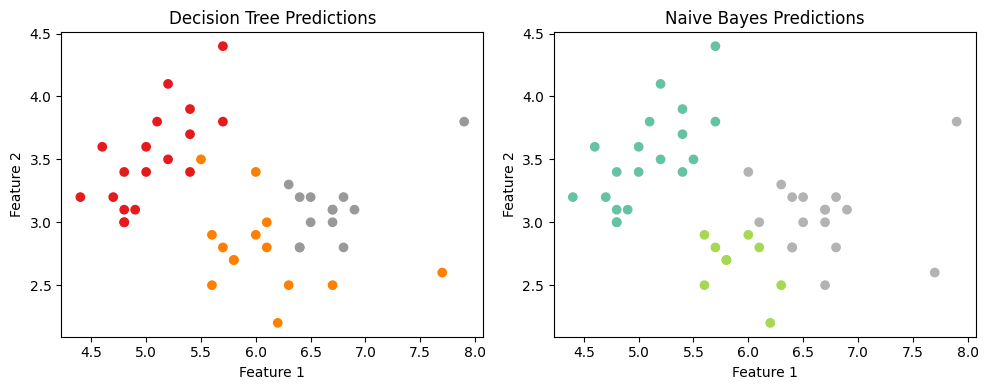

In [66]:
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.scatter(X_test[:,0], X_test[:,1], c=y_pred_tree, cmap='Set1')
plt.title("Decision Tree Predictions")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")

# Plot Naive Bayes predictions
plt.subplot(1,2,2)
plt.scatter(X_test[:,0], X_test[:,1], c=y_pred_nb, cmap='Set2')
plt.title("Naive Bayes Predictions")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")

plt.tight_layout()
plt.show()

In [67]:
def plot_decision_boundary(model, X, y, title):

    h = 0.02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(7, 5))
    plt.contourf(xx, yy, Z, cmap="Set2", alpha=0.6)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap="Set2", edgecolor='k', s=50)
    plt.xlabel("Sepal length")
    plt.ylabel("Sepal width")
    plt.title(title)
    plt.show()

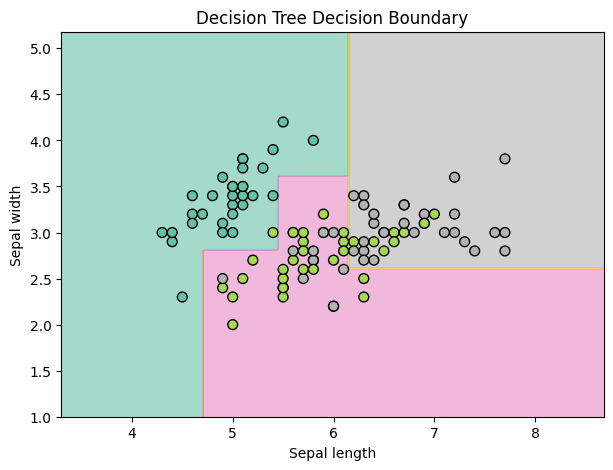

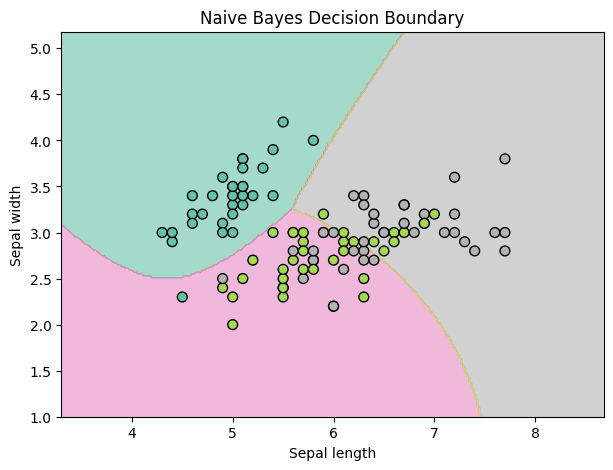

In [68]:
plot_decision_boundary(tree_clf, X_train, y_train, "Decision Tree Decision Boundary")
plot_decision_boundary(nb_clf, X_train, y_train, "Naive Bayes Decision Boundary")


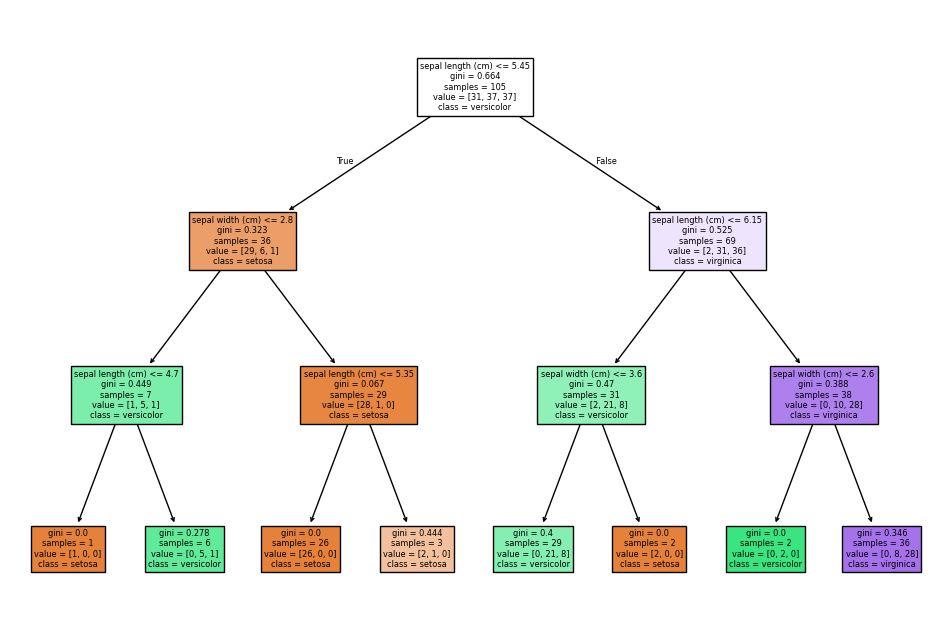

In [69]:
plt.figure(figsize=(12,8))
plot_tree(tree_clf, filled=True, feature_names=iris.feature_names, class_names=iris.target_names)
plt.show()
